# Predicting Handwritten Digits - Building a Classifier

ML techniques used in this project: K-Nearest Neighbors, Neural Networks with varying hidden layers.

## Introduction
The purpose of this project is three-fold:
* Explain why image classification is so hard
* Observe the limits of traditional machine learning models for image classification 
* Make a few different deep neural networks for image classification

Deep neural networks have been used in state-of-the-art image classification models for quite some time now. In fact, deep neural networks actually perform better than humans sometimes. It is now widely accepted as the go-to model for things that involve images and the such.

We'll be building a handwritten classificaion model (or attempt to) also in this project. Before 2000, institutions such as the USPS used models and software just like this to recognize thigns such as addresses, zip codes, etc. 

A couple of optional papers on the history of deep learning: https://arxiv.org/ftp/arxiv/papers/1803/1803.01164.pdf, as well as one of the USPS models: http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.852.5499&rep=rep1&type=pdf.

## Image Classification - It's Hard!
Within the ML field, image classification - and especially handwritten text, is obviously on the harder end of the spectrum. The first reason for this is pixels. In a simple ML model , there are a couple or a few features. In the most very basic of pictures, let's say a 128 x 128 image (very small), this means already 16384 features!

Second, in part because of the first reason, images are often scaled down significantly, and also tranformed to gray scale (RGB adds x3 features). Images of huge sizes are often reduced down to smaller ones for 'less' features, thus resulting in a loss of detail.

There is also the fact that the features in an image do not have an obvious relationship like regular numbers do. We cannot tell immdediately whether something in linear or non-linear, so we cannot use regression. Everything is just rendered in a matrix of the grayscale values (0-255), with each row representating an observation.

<br> 

Deep learning can be effective for all of these problems in image classification. This is because of the models' ability to learn hierarchical representations. At a high level, an effective deep learning model learns intermediate representations at each layer in the model and uses them in the prediction process. 

For example, in a facial recognition model, the input layer might be the images of faces themselves. The first hidden layer might be the edges and specific features of faces that the network learns. The second hidden layer might have the weights represent higher level facial features such as eyes, ears, and noses. The third hidden layer might involve whole faces that can be matched against. We can see that each new layer uses information and weights from previous layers to try and learn even more and gain more complex representations.

We will try to do this with a feedforward neural network to classify images of handwritten numbers (digits).

## Image Data
We can actually pre-load a dataset from UCI (http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits) in the scikit-learn library (by now we realize what a godsend this library is). Dataframes are in a tabular representation form of data, so loading this data makes it so each image is represented as a row of pixel values. 

To visualize an image from a df, we need to reshape the image back to its original dimensions (in this case, 28 x 28) and plot them on a coordinate grid. In order to do this, we reshape a training example to a numpy array (excluding the label column) and use the reshape function. 

Then, we can use pyplot's imshow function to visualize. To display multiple images, axes.imshow can do this. An example will be shown below of the process to display iamges from both classes.

In [1]:
# get neccessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# get images - this returns a tuple of X,y train and labels
images = load_digits(return_X_y = True)

# get the X part for the train df - column names irrelevant (just pixels)
features = pd.DataFrame(images[0])

# get the y part for the test df
labels = pd.DataFrame(images[1])

# see rows of train and shape of both
print(features.shape)
print(labels.shape)
features.head()

(1797, 64)
(1797, 1)


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


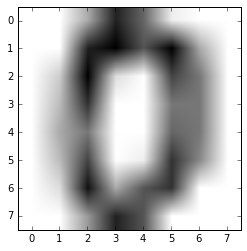

In [3]:
# get the first image and reshape it back to 8x8
first_image = features.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8,8)

# display the first image!
plt.imshow(np_image, cmap='gray_r')

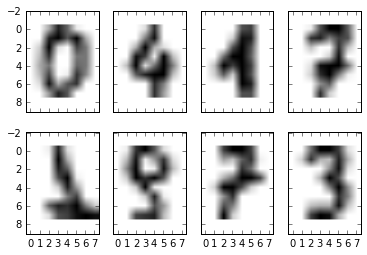

In [4]:
# get a figure to display more images
fig, axs = plt.subplots(2, 4, sharex=True, sharey=True)

# get example images
rows = [0, 100, 200, 300, 1000, 1100, 1200, 1300]
index = 0
for row in rows:
    image = features.iloc[row]
    image = image.values.reshape(8,8)
    rows[index] = image
    index += 1

# plot each image in respective plot
axs[0, 0].imshow(rows[0], cmap='gray_r')
axs[0, 1].imshow(rows[1], cmap='gray_r')
axs[0, 2].imshow(rows[2], cmap='gray_r')
axs[0, 3].imshow(rows[3], cmap='gray_r')
axs[1, 0].imshow(rows[4], cmap='gray_r')
axs[1, 1].imshow(rows[5], cmap='gray_r')
axs[1, 2].imshow(rows[6], cmap='gray_r')
axs[1, 3].imshow(rows[7], cmap='gray_r')

As we can see, each image is blurry and loses detail as stated before. However, we can make out for the most part what each one is supposed to represent in terms of digits. Now let's see if we can get a model to do it as well!

## K-Nearest Neighbors Model
While it was described before that we can't really use linear and logistic regression models for this type of data because they make assumptions about linearity, we can use the k-nearest neighbors algorithm because this algorithm does not make that assumption. 

K-nearest neighbors is a 'traditional' ML algorithm in the sense that it does not use deep learning. Note the use of the word algorithm and not model because technically k-nearest neighbors don't have a specific model representation. 

The algorithm compares every unseen observation in the test set to all the seen training observations to look for similar 'spots' (for more on this - there is a k-nearest algorithms project on predicting car prices in the source folder). The algorithm then finds the label with the most of these spots and assigns a prediction.

To compare neural network results to that of a more traditional ML model, we implement a k-nearest neighbors 'model' on the image data below as a test.

In [5]:
# get k-nearest neighbors library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

In [6]:
# create knn function with cross validation
# returns the average score, std score with 4-fold cross validation 
def knn(features, labels, k, folds):    
    # set random seed for fold - for workbook explanations
    # remove random_state part out in real life
    kf = KFold(folds, shuffle=True, random_state=1)
    
    # initiate model 
    model = KNeighborsClassifier(n_neighbors = k)
    
    # list of scores
    scores = []
    
    # for each fold...
    for train, test in kf.split(features):
        # split the 2 dfs into train and test sets
        train_features = features.iloc[train]
        train_labels = labels.iloc[train]
        test_features = features.iloc[test]
        test_labels = labels.iloc[test]
        
        # train the model - use ravel for y 
        model.fit(train_features, np.ravel(train_labels))
        
        # predict the test set
        predictions = model.predict(test_features)
        
        # get the accuracy scores
        score = accuracy_score(test_labels, predictions)
        scores.append(score)
    
    # get metrics and return
    avg_score = np.mean(scores)
    std_score = np.std(scores)
    
    return avg_score, std_score

In [7]:
# create a model instance
knn_digits = knn(features, labels, 5, 4)
    
# print some information
print("average knn model score: ", knn_digits[0], 
      "\naverage knn model std: ", knn_digits[1])

average knn model score:  0.9832999257609502 
average knn model std:  0.008111616735676333


Notice how we can now get an entire model trained and tested in one cell compared to other projects ;)

Our model is actually able to predict with up to 98% accuracy! We designed it to be able to fiddle with the number of k neighbors to choose or how many folds to make. Some examples of changes:

In [8]:
# make list of ks and folds
ks = [1, 3, 5, 7, 9]
num_folds = [2, 4, 6, 8, 10]

# iterate through each
for k in ks:
    for num in num_folds:
        # make a model for each one and print info
        knn_digits = knn(features, labels, k, num)
        print("model score,", k, "neighbors,", num, "folds:", knn_digits[0], 
              "\nmodel std,", k, "neighbors,", num, "folds:", knn_digits[1],
             "\n")

model score, 1 neighbors, 2 folds: 0.9788523997215416 
model std, 1 neighbors, 2 folds: 0.0022377003896930647 

model score, 1 neighbors, 4 folds: 0.9827456075228903 
model std, 1 neighbors, 4 folds: 0.005080100024846866 

model score, 1 neighbors, 6 folds: 0.9860832404310664 
model std, 1 neighbors, 6 folds: 0.0035825619659157807 

model score, 1 neighbors, 8 folds: 0.9860912698412698 
model std, 1 neighbors, 8 folds: 0.008463365691670196 

model score, 1 neighbors, 10 folds: 0.9872036002482931 
model std, 1 neighbors, 10 folds: 0.007049769985959297 

model score, 3 neighbors, 2 folds: 0.9816357447398867 
model std, 3 neighbors, 2 folds: 0.0005667024236283291 

model score, 3 neighbors, 4 folds: 0.9855283345706509 
model std, 3 neighbors, 4 folds: 0.005108495408949403 

model score, 3 neighbors, 6 folds: 0.9860888145670755 
model std, 3 neighbors, 6 folds: 0.0044790922025481125 

model score, 3 neighbors, 8 folds: 0.9855406746031745 
model std, 3 neighbors, 8 folds: 0.0101298317787934

As we can see with the different models shown, we consistently have accuracy rates of 97-98% across many different k and fold values, which should validate the model process.

## Neural Networks - One Hidden Layer
There were a few downsides to using k-nearest neighbors - even if it did produce a very good accuracy rate. 

Firstly, it has a high memory usage - for each new unseen observation, many comparisons have to be made to the ones already seen. 

There is also the fact that there is no model representation for the algorithm and thus we have no way of debugging the algorithm or exploring over/underfitting. 

A neural network model with a single hidden layer can solve both of these problems while also retaining the same amount of accuracy (if not better!). We will use the MLPClassifier class to implement one now, and validate with our default of 4-folds. We will test with many different combinations of neurons in the hidden layer.

In [9]:
# get neural network library
from sklearn.neural_network import MLPClassifier

# create nn function with cross validation
# returns the average score, std score with 4-fold cross validation 
def nn(features, labels, n, folds):    
    # set random seed for fold - for workbook explanations
    # remove random_state part out in real life
    kf = KFold(folds, shuffle=True, random_state=1)
    
    # initiate model 
    model = MLPClassifier(hidden_layer_sizes=(n,),
                           learning_rate_init=0.01)
    
    # list of scores
    scores = []
    
    # for each fold...
    for train, test in kf.split(features):
        # split the 2 dfs into train and test sets
        train_features = features.iloc[train]
        train_labels = labels.iloc[train]
        test_features = features.iloc[test]
        test_labels = labels.iloc[test]
        
        # train the model - use ravel for y 
        model.fit(train_features, np.ravel(train_labels))
        
        # predict the test set
        predictions = model.predict(test_features)
        
        # get the accuracy scores
        score = accuracy_score(test_labels, predictions)
        scores.append(score)
    
    # get metrics and return
    avg_score = np.mean(scores)
    std_score = np.std(scores)
    
    return avg_score, std_score

In [10]:
# create list of neuron sizes
n_sizes = [8, 16, 32, 64, 128, 256]

# create respective model instances
for n in n_sizes:
    print("neurons:", n)
    nn_digits = nn(features, labels, n, 4)
    
    # print some information
    print("average nn model score: ", nn_digits[0], 
      "\naverage nn model std: ", nn_digits[1])

neurons: 8
average nn model score:  0.5661160603810937 
average nn model std:  0.28177454087459625
neurons: 16
average nn model score:  0.9454590447908934 
average nn model std:  0.012370403055015862
neurons: 32
average nn model score:  0.9599257609502598 
average nn model std:  0.012316103965921518
neurons: 64
average nn model score:  0.9721727295223954 
average nn model std:  0.006407859335103846
neurons: 128
average nn model score:  0.9654924523632764 
average nn model std:  0.009264902784391916
neurons: 256
average nn model score:  0.974955456570156 
average nn model std:  0.007456893115383335


We used the same code as with the knn models, with a few adjustments. We also set the learning rate a little higher than default in the nn initiater in order to 'speed' up convergence. More on that can be found in the documentation of the class.

We see from our model printouts that accuracy starts to wane from the 5th to the 6th model - 128 to 256 neurons respectively, in terms of std, which might be a sign of overfitting.

Normally, we would test on both the train and test sets to see overfitting, but for these examples using the kfold validation works good enough.

If we use this information to our advantage and select the 5th model wih 128 neurons in a single hidden as our 'optimal' model, we see that it more or less matches the knn accuracy - with the added benefits of what we described before; we accounted for memory usage and now have a model representation if we wished to display it.

Note: it is also important to note that we are using very very basic 8x8 images.  If these features were expanded into 20x20, 64x64, etc. (still very basic!) images, it would start to become very more clear that nn is superior to knn.

## Neural Networks - Two Hidden Layers
With just one hidden layer, we managed to match our knn model accuracy predictions. Now what if we increased the number of hidden layers to 2? To save computation time, we'll implement less models than with one hidden layer, but the basis is the same. 

In [11]:
# remake function to account for multiple layers
# this is just a copy and paste with the parameter line altered
# create nn function with cross validation
# returns the average score, std score with 4-fold cross validation 
def nn(features, labels, layers, folds):    
    # set random seed for fold - for workbook explanations
    # remove random_state part out in real life
    kf = KFold(folds, shuffle=True, random_state=1)
    
    # initiate model 
    model = MLPClassifier(hidden_layer_sizes=layers,
                           learning_rate_init=0.01)
    
    # list of scores
    scores = []
    
    # for each fold...
    for train, test in kf.split(features):
        # split the 2 dfs into train and test sets
        train_features = features.iloc[train]
        train_labels = labels.iloc[train]
        test_features = features.iloc[test]
        test_labels = labels.iloc[test]
        
        # train the model - use ravel for y 
        model.fit(train_features, np.ravel(train_labels))
        
        # predict the test set
        predictions = model.predict(test_features)
        
        # get the accuracy scores
        score = accuracy_score(test_labels, predictions)
        scores.append(score)
    
    # get metrics and return
    avg_score = np.mean(scores)
    std_score = np.std(scores)
    
    return avg_score, std_score

In [12]:
# create list of neuron sizes
n_sizes = [(64,64), (128,128)]

# create respective model instances
for n in n_sizes:
    print(n)
    nn_digits = nn(features, labels, n, 4)
    
    # print some information
    print("average nn model score: ", nn_digits[0], 
      "\naverage nn model std: ", nn_digits[1])

(64, 64)
average nn model score:  0.9688344469190795 
average nn model std:  0.0078826769910139
(128, 128)
average nn model score:  0.9705035882207375 
average nn model std:  0.006383522659629946


Two hidden layers saw the same amount of accuracy on average but further reduced the std - showing some form of improvement. However, the models do show a bit of a sign of overfitting again because of the std increase from 64 to 128 neurons. 

It is safe to say that with only 8x8 features, we don't really need to make this model more complex than it needs to be. Diminishing returns is a very real thing, and sometimes it can even result in negative returns (overfitting).

## Neural Networks - Three Hidden Layers
...That being said, just for fun, let's see what three hidden layers look like just for kicks. At this point, overfitting turns from a mild precaution to a somewhat inevitable thing, so we account as best as we can by increasing the number of k-folds to 6 in the validaion. 

The same tests as two hidden layers are displayed below, with each layer having the same number of neurons (Note: in practice, this is widely accepted as the best thing to do). We've added a 10 neuron parameter just to see what a smaller number looks like.

In [13]:
# create list of neuron sizes
n_sizes = [(10,10,10), (64,64,64), (128,128,128)]

# create respective model instances
for n in n_sizes:
    print(n)
    nn_digits = nn(features, labels, n, 6)
    
    # print some information
    print("average nn model score: ", nn_digits[0], 
      "\naverage nn model std: ", nn_digits[1])

(10, 10, 10)
average nn model score:  0.888130806391676 
average nn model std:  0.03146645654565916
(64, 64, 64)
average nn model score:  0.976062801932367 
average nn model std:  0.007837106820608645
(128, 128, 128)
average nn model score:  0.970527684875511 
average nn model std:  0.01443307276514352


We see that again, the model seems to overfit starting from the 64 to 128 neuron iteration, so it's probably best to accept the 64 neuron one as the 'best' one. 

The std by the time we get to 3 layers is significantly reduced, but as stated before, to avoid pushing overfitting and since the model accuracy was always sitting around 97% anyway, it is best to use Occam's Razor here and conclude that one hidden layer is just fine, at least in terms of this data set.

Even though we increased the k-Folds to 6 to account for overfitting, it is still true regardless that the more layers we have, the more complex the models get, and the more we risk this chance. Choosing the best model most of the time means choosing the simplest one.

## Further Analysis / Next Steps
We experimented with a couple of different types of models so far to classify digits, but there are a few more things to talk about...

## Other Types of Models
While (especially for classifying images) neural networks are seen as the 'go-to' model type for these types of problems, seeing how other algorithms and model types handle this data set just like with the k-nearest neighbors algorithm can help us understand things such as schema, limitations, advantages, etc. 

Other such model types that are compatible with this dataset include decision trees and random forests. Since they are both kind of sort of related to neural networks, the process will be quite similar (basically just another copy and paste, essentially).

Since a random forest model is pretty much an evolved form of the decision tree model, we'll include just a quick example of that below to avoid redundancy.

In [14]:
# get random forest tools
from sklearn.ensemble import RandomForestClassifier

# create rf function with cross validation
# returns the average score, std score with 4-fold cross validation 
def rf(features, labels, split, folds):    
    # set random seed for fold - for workbook explanations
    # remove random_state part out in real life
    kf = KFold(folds, shuffle=True, random_state=1)
    
    # initiate model - use min_samples_split for overfitting accounting
    model = RandomForestClassifier(min_samples_split=split)
    
    # list of scores
    scores = []
    
    # for each fold...
    for train, test in kf.split(features):
        # split the 2 dfs into train and test sets
        train_features = features.iloc[train]
        train_labels = labels.iloc[train]
        test_features = features.iloc[test]
        test_labels = labels.iloc[test]
        
        # train the model - use ravel for y 
        model.fit(train_features, np.ravel(train_labels))
        
        # predict the test set
        predictions = model.predict(test_features)
        
        # get the accuracy scores
        score = accuracy_score(test_labels, predictions)
        scores.append(score)
    
    # get metrics and return
    avg_score = np.mean(scores)
    std_score = np.std(scores)
    
    return avg_score, std_score

In [15]:
# make list splits
splits = [5, 10, 15]

# create respective model instances
for split in splits:
    print("min_splits =", split)
    rf_digits = rf(features, labels, split, 4)
    
    # print some information
    print("average rf model score: ", rf_digits[0], 
      "\naverage rf model std: ", rf_digits[1])

min_splits = 5
average rf model score:  0.9471306607275427 
average rf model std:  0.004855067833944681
min_splits = 10
average rf model score:  0.9449084385053205 
average rf model std:  0.0071064342344826035
min_splits = 15
average rf model score:  0.9426849789656027 
average rf model std:  0.005508919345013933


The random forest model is by no means bad - it has a very accurate hit rate - but it just shows why models such as neural networks have been state-of-the-art for quite some time now. There are not many things out there that can compare. 

We could tweak this random forest model to perhaps be on par with that of a simple neural network, but at that point the random forest becomes so complex that overfitting is almost a certainty. Again, it is best to choose the simplest thing that works best.

## Effectiveness of Models
We've talked a lot about how in terms of image classification, neural networks and deep learning seem to be your best bet. All in all, though, there is always room for error and there is always room for one model to be better than the other in different situations. This is just sort of a 'catch-all' statement, and we should always start here rather than finish.

To learn more about the effectiveness of deep learning models, especially for image classification, this blog post does wonders: https://medium.com/zylapp/review-of-deep-learning-algorithms-for-image-classification-5fdbca4a05e2. 

Other than that, just like this project, it really is a trial and error process for each dataset, and that's sort of the beauty of data science to begin with! Every project shares similarities, but every project is different.

## Different Activation Functions
In our neural network model, we did not include the activiation function parameter in the initiation because we used the default 'ReLu'. While there are other activation functions available for us to use, such as the sigmoid (logistic) or tanh functions, it is best believed (at least in 2019) that a ReLu function works best with hidden layers and deep networks.

More about that topic and the differences between functions can be found here: https://towardsdatascience.com/activation-functions-and-its-types-which-is-better-a9a5310cc8f. 

In terms of this project, making a model with different activation function is just a matter of changing 1-2 words in the parameters, so to avoid redundancy we leave it up to the reader's trust to say that changing these functions will not really change the accuracy of the model, and if anything it would make it a little worse.

## Visualizing Weights
We provided visualizations of the inputs at the start of the project, and obviously the outputs are the classes themselves.

An interesting part of the process is the fact that we can 'pause' the model at different layers and visualize what we have at each layer as well. This way we can see what the model is computing and what the model sees at each step of the process. An example is provided below:

Automatically created module for IPython interactive environment
Training set score: 1.000000
Test set score: 0.919911


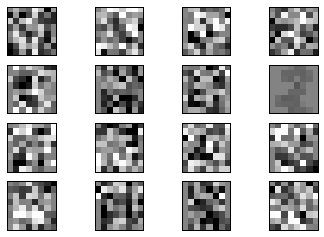

In [16]:
# information about Python environment
print(__doc__)

# Load data into X, y
X, y = features, labels

# rescale the data into basic train and test splits for an example
divider = int(X.shape[0] / 2)
X_train, X_test = X[:divider], X[divider:]
y_train, y_test = y[:divider], y[divider:]

# set basic model up using an 'optmial' 64 neuron layer that we found
mlp = MLPClassifier(hidden_layer_sizes=(64,), learning_rate_init=.01)

# train model and print scores for each respective set
mlp.fit(X_train, np.ravel(y_train))
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

# create figures for plots
fig, axes = plt.subplots(4, 4)

# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()

# loop through sample of each "weight" and get what each one is looking at
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(8, 8), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

# display results
plt.show()

We see that the weight visualizations are pretty blurry, but this is not the final product, after all. The model will use information from each of these to form a final decision on the classification for the output. 

## Other Things to Look Into
Topics that correlate to this project:
* Image classification and computer vision - today's front line research is much more advanced than just simple handwriting classification!
* Higher performance tools for nerual networks - Tensorflow and PyTorch are worth getting familiar with for much higher accuracy and efficiency with larger datasets.
* Different neural network architectures - such as Convolutional Neural Networks (while we stated that common practice is to have the same amount of neruons for each layer, there are obviously always exceptions, and depending on how your architecture is laid out, that can make all the difference in your model.

## Conclusion
There are countless areas of topics to explore in terms of neural networks and deep learning, and it would take years to master it all. Perhaps even lifetimes! (This is why open source and pooling knowledge is a good thing.) For the short term goal-maker, it is probably best to be a jack of all trades, then master one.

In terms of the scope of this project, we tried classifying different handwritten digits using both a k-nearest neighbors algorithm and a multilayer preception feed forward nerual network (with a dabble in a random forest), and determined that they're both pretty good at it (surprise, surprise). However, it was explained that the latter model is probably more useful than the former in terms of both form and function. 

We can adust many different parameters in a neural network, draw out and visualzie a diagram if needed, and account for overfitting in many different ways than just using a K-Fold. Moreover, as our datasets get larger and larger (which they should be), k-nearest neighbors will suddenly become unusable due to high memory usage. It is best to get used to neural networks now in terms of image classification! Deep learning gets a whole lot more deep than this, but this project was the perfect basis for it.